In [2]:
from match import * 

PrevTour = None
n = 8
counter = 1
with open("Data.txt","w") as f:
    f.write("Data = [ ")

In [ ]:
m = int(pow(2, n))
turnament = Tournament(n - 1) if PrevTour == None else PrevTour
print(turnament)
while True:
    for i in range(50):
        turnament.rank()
        GenData = [   
                    Match(turnament.ranking[i], turnament.ranking[i + 1]).getResult(
                        False
                    )
                    for i in range(0, len(turnament.ranking), 2)
                ]
        GenData = [(x,z) for x,y,z,w in GenData]
        GenData = [x for par in GenData for x in par]
        with open("Data.txt", "a") as f:
            f.write(str(GenData) + ", ")
        
        counter += 1
        

        print(counter)
        # print(
        #     Match(turnament.ranking[0], turnament.ranking[1]).getResult(
        #          False
        #     )
        # )
        PrevTour = turnament
        turnament = Tournament(
            reproduce(
                turnament.ranking,
                Keep=m // 2 + m // 32,
                Mixes=m // 16,
                Selections=m // 16,
                SingleMutations=m // 16,
                SlabMutations=m // 32,
                RainMutations=m // 16,
            )
        )

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [18]:
 
print(counter)

12


In [14]:
from os import system
system("copy Data.txt Data.py")
with open("Data.py", "a") as f:
            f.write("]")

In [15]:
import Data 
import importlib
importlib.reload(Data)

 
Max = [max([val for val in gen]) for gen in Data.Data]
Avg = [sum([val for val in gen])/len(gen) for gen in Data.Data]
print(Data.Data)
print("Max : ",Max)
print("Avg : ",Avg)




[[-39, -42, -8, -10, -8, -8, -34, -32, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -34, -32, -23, -23, -8, -10, -8, -8, -8, -9, -8, -10, -23, -34, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -34, -32, -39, -42, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -8, -9, -8, -9, -8, -10, -8, -9, -39, -42, -8, -10, -8, -8, -34, -32, -39, -42, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -11, -11, -8, -9, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -34, -32, -39, -42, -8, -10, -8, -8, -8, -9, -39, -42, -8, -10, -8, -8, -8, -9, -23, -23, -8, -10, -8, -8, -8, -9, -39, -42, -

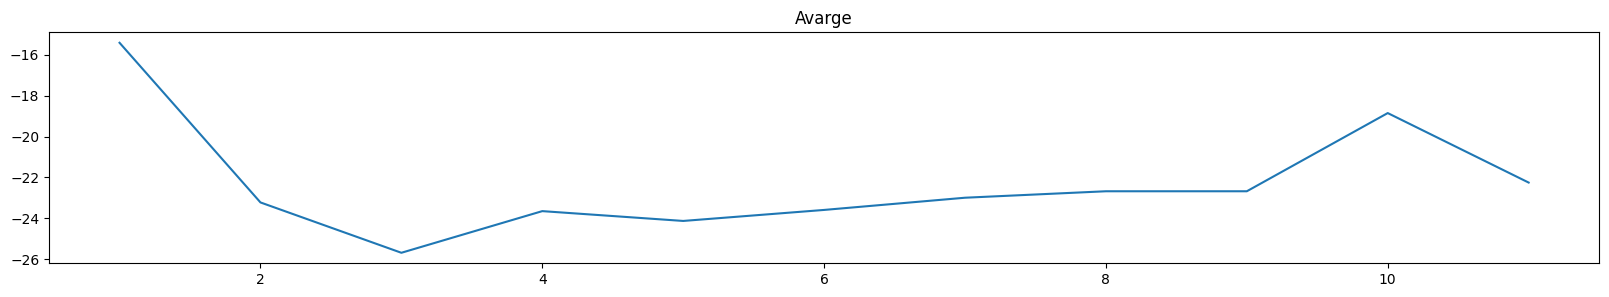

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))

plt.plot(list(range(1,len(Avg)+1)), Avg)
plt.title( "Avarge")
plt.savefig('Avrage.png',dpi=600)


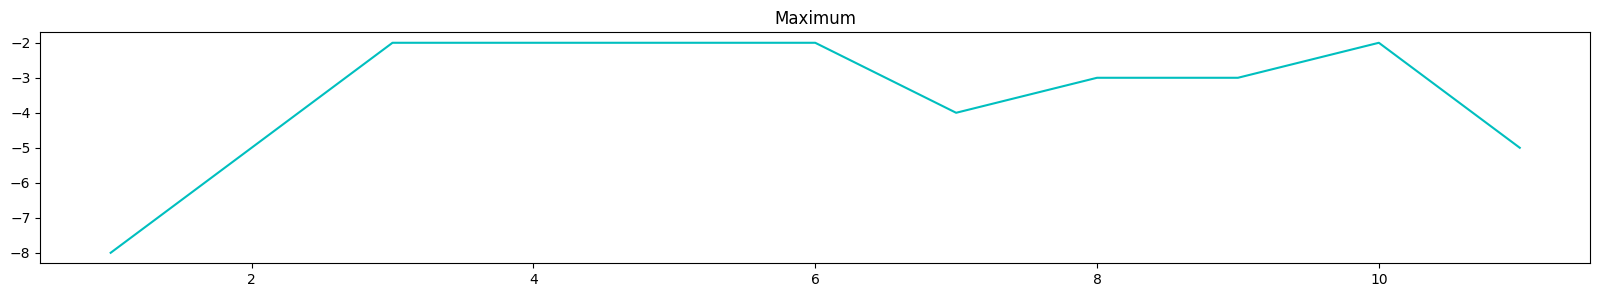

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
 
plt.plot(list(range(1,len(Max)+1)), Max,color="c")
plt.title( "Maximum")
plt.savefig('Max.png',dpi=600)